# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Ruchi Jha \
**Email:** rj2807@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 7 sixes out of 10 rolls
P(A | 7 sixes) = 0.000
P(B | 7 sixes) = 0.040
P(C | 7 sixes) = 0.960
True die: C


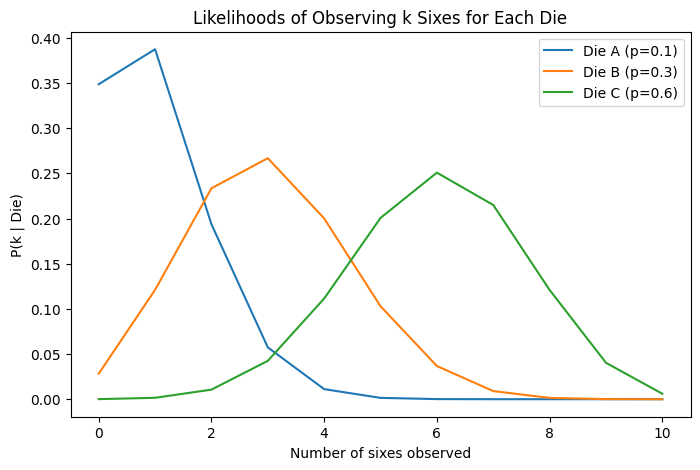

Accuracy over 100 rounds: 0.76


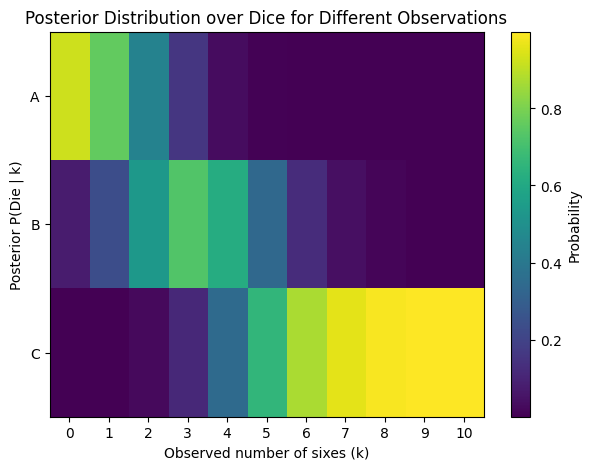

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.ones(len(dice_names)) / len(dice_names)
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
    pass

def simulate_round():
    true_die = np.random.choice(dice_names)
    p_six = dice_probs[true_die]
    rolls = np.random.rand(n_rolls) < p_six
    k = int(np.sum(rolls))
    return true_die, k
    pass

def posterior_given_k(k):
    likelihoods = np.array([
        binomial_prob(n_rolls, k, dice_probs[die]) for die in dice_names
    ])
    unnorm_post = likelihoods * prior
    total = unnorm_post.sum()
    if total == 0:
        return prior
    return unnorm_post / total
    pass

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [2]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_pred = X @ theta
mse_linear = np.mean((y - y_pred) ** 2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Learning rate α = 1/400
Step 0: w = 13.000000, f(w) = 80.000000
Step 1: w = 12.600000, f(w) = 32.768000
Step 2: w = 12.395200, f(w) = 18.945928
Step 3: w = 12.259406, f(w) = 12.578636
Step 4: w = 12.159529, f(w) = 9.038498

Learning rate α = 1/4,000,000
Step 0: w = 13.000000, f(w) = 80.000000
Step 1: w = 12.999960, f(w) = 79.993600
Step 2: w = 12.999920, f(w) = 79.987201
Step 3: w = 12.999880, f(w) = 79.980803
Step 4: w = 12.999840, f(w) = 79.974405


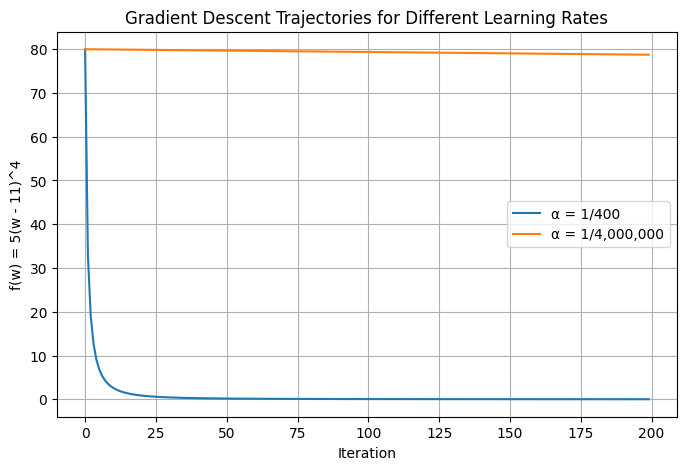

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w = w0
    history = []
    for t in range(steps):
        f_val = 5 * (w - 11) ** 4
        history.append((w, f_val))
        grad = 20 * (w - 11) ** 3
        w = w - alpha * grad
    return np.array(history)
    pass

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

print("Learning rate α = 1/400")
for i in range(5):
    w_i, f_i = hist_140[i]
    print(f"Step {i}: w = {w_i:.6f}, f(w) = {f_i:.6f}")

print("\nLearning rate α = 1/4,000,000")
for i in range(5):
    w_i, f_i = hist_180[i]
    print(f"Step {i}: w = {w_i:.6f}, f(w) = {f_i:.6f}")

plt.figure(figsize=(8,5))
plt.plot(range(len(hist_140)), hist_140[:, 1], label="α = 1/400")
plt.plot(range(len(hist_180)), hist_180[:, 1], label="α = 1/4,000,000")
plt.xlabel("Iteration")
plt.ylabel("f(w) = 5(w - 11)^4")
plt.title("Gradient Descent Trajectories for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

ALL THE BEST!